**MSc Computational Physics AUTH**<br>
**Computational Quantum Physics**<br>
**Academic Year: 2023-2024**<br>
**Semester 2**<br>
**Implemented by: Ioannis Stergakis**<br>
**AEM: 4439**<br>

# **FINAL PROJECT 2:**<br>
# ***Part1: Applying machine learning classification models in hypersymmetric Higgs bosons detection***

**Jupyter Notebook 1**<br> 

**Contents:**<br>
*->1. Data importing and preprocessing*<br>
*->2. SVM classification algorithm*<br>
*->3. Random Forest classification algorithm*<br>

## **1. Data Importing and Preprocessing**

In [1]:
# Numpy module import
import numpy as np

# Module for data importation and presentaion
import pandas as pd
from pandas import DataFrame

# Module for detecting and imputing missing data
import missingno as msno

# ML package for splitting the dataframe into train and test set
from sklearn.model_selection import train_test_split

# ML package for data scalling
from sklearn.preprocessing import StandardScaler

### **1.1 Data importation, imputation and presentation**

#### **A. Importation**

In [2]:
# Importing the Higgs detection data
df_Higgs=pd.read_csv("HIGGS_8K.csv",header=None)

# Showing the data
df_Higgs


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,0.0,1.630428,0.404143,0.401026,2.722409,0.355644,1.362199,0.015818,-1.174111,0.000000,...,0.387635,1.596321,1.550981,0.859235,0.827233,0.995416,0.764766,0.520597,0.850413,0.929865
2,1.0,0.326305,-0.797735,0.223471,1.248234,-1.427857,0.923767,-0.278280,-0.470052,0.000000,...,-0.426866,1.153501,0.000000,0.887944,0.924601,0.987189,0.854094,0.385013,0.789912,0.724627
3,1.0,1.381170,0.521993,0.574698,0.357347,0.037136,0.413057,-0.607036,-1.308270,0.000000,...,0.567525,-1.475778,0.000000,0.936186,1.107217,0.983808,0.693327,0.562045,0.825387,0.846233
4,1.0,0.304161,-0.736375,0.686225,0.477172,-1.274736,0.907003,0.324770,-0.463954,2.173076,...,0.904818,1.165154,0.000000,1.181790,1.033701,0.993943,0.648399,0.936097,0.732592,0.661779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7996,1.0,0.835437,0.087603,-0.254367,0.565305,0.647809,0.488175,1.169436,1.527465,0.000000,...,0.632485,-0.704450,1.550981,0.566228,1.016260,0.983104,0.587913,0.661417,0.670422,0.641382
7997,0.0,0.817685,-0.189004,-1.441773,0.259808,-0.360375,1.600286,1.249645,-0.146851,2.173076,...,-0.765825,1.250610,0.000000,0.926674,1.004506,0.983705,1.954265,0.962375,1.358500,1.227740
7998,1.0,0.425313,0.888205,0.363851,0.573086,1.279933,1.639952,-1.225930,0.082208,0.000000,...,1.210464,-0.117351,0.000000,1.002153,1.521563,0.988448,0.813080,0.786715,1.202513,1.663360
7999,0.0,1.359575,-1.438606,-0.095677,0.524665,0.918297,1.181000,0.935742,-1.345968,1.086538,...,-0.107062,-1.701072,0.000000,0.814407,0.920867,0.987094,2.352376,1.146577,1.479682,1.433999


#### **B. Imputation**

In [3]:
# Showing the 18th column's (or 17th column in Python enumeration) first element
# this element (as all elements of this column are in str type) and can not be converted to float
df_Higgs[17][0]

'0.000000000000000000e+00.1'

In [4]:
# To avoid errors in future caclulations we replace this element's value with 0
df_Higgs[17][0] = 0

# Then we cast all elements of 17th column to float type
n = len(df_Higgs[17])
for i in range(0,n):
    df_Higgs[17][i] = float(df_Higgs[17][i])  

C:\Users\johns\AppData\Local\Temp\ipykernel_13268\1516993424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Higgs[17][0] = 0
C:\Users\johns\AppData\Local\Temp\ipykernel_13268\1516993424.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Higgs[17][i] = float(df_Higgs[17][i])
C:\Users\johns\AppData\Local\Temp\ipykernel_13268\1516993424.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Higgs[17][i] = float(df_Higgs[17][i]

In [5]:
# Data imputation

# Replacing the missing data (0's in data) with NaN, except first column (class column)
df_Higgs[df_Higgs.loc[:,1:]==0]=np.nan

# Showing the filled with NaN's data
df_Higgs

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,NaN,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,0.0,1.630428,0.404143,0.401026,2.722409,0.355644,1.362199,0.015818,-1.174111,NaN,...,0.387635,1.596321,1.550981,0.859235,0.827233,0.995416,0.764766,0.520597,0.850413,0.929865
2,1.0,0.326305,-0.797735,0.223471,1.248234,-1.427857,0.923767,-0.278280,-0.470052,NaN,...,-0.426866,1.153501,NaN,0.887944,0.924601,0.987189,0.854094,0.385013,0.789912,0.724627
3,1.0,1.381170,0.521993,0.574698,0.357347,0.037136,0.413057,-0.607036,-1.308270,NaN,...,0.567525,-1.475778,NaN,0.936186,1.107217,0.983808,0.693327,0.562045,0.825387,0.846233
4,1.0,0.304161,-0.736375,0.686225,0.477172,-1.274736,0.907003,0.324770,-0.463954,2.173076,...,0.904818,1.165154,NaN,1.181790,1.033701,0.993943,0.648399,0.936097,0.732592,0.661779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7996,1.0,0.835437,0.087603,-0.254367,0.565305,0.647809,0.488175,1.169436,1.527465,NaN,...,0.632485,-0.704450,1.550981,0.566228,1.016260,0.983104,0.587913,0.661417,0.670422,0.641382
7997,0.0,0.817685,-0.189004,-1.441773,0.259808,-0.360375,1.600286,1.249645,-0.146851,2.173076,...,-0.765825,1.250610,NaN,0.926674,1.004506,0.983705,1.954265,0.962375,1.358500,1.227740
7998,1.0,0.425313,0.888205,0.363851,0.573086,1.279933,1.639952,-1.225930,0.082208,NaN,...,1.210464,-0.117351,NaN,1.002153,1.521563,0.988448,0.813080,0.786715,1.202513,1.663360
7999,0.0,1.359575,-1.438606,-0.095677,0.524665,0.918297,1.181000,0.935742,-1.345968,1.086538,...,-0.107062,-1.701072,NaN,0.814407,0.920867,0.987094,2.352376,1.146577,1.479682,1.433999


<Axes: >

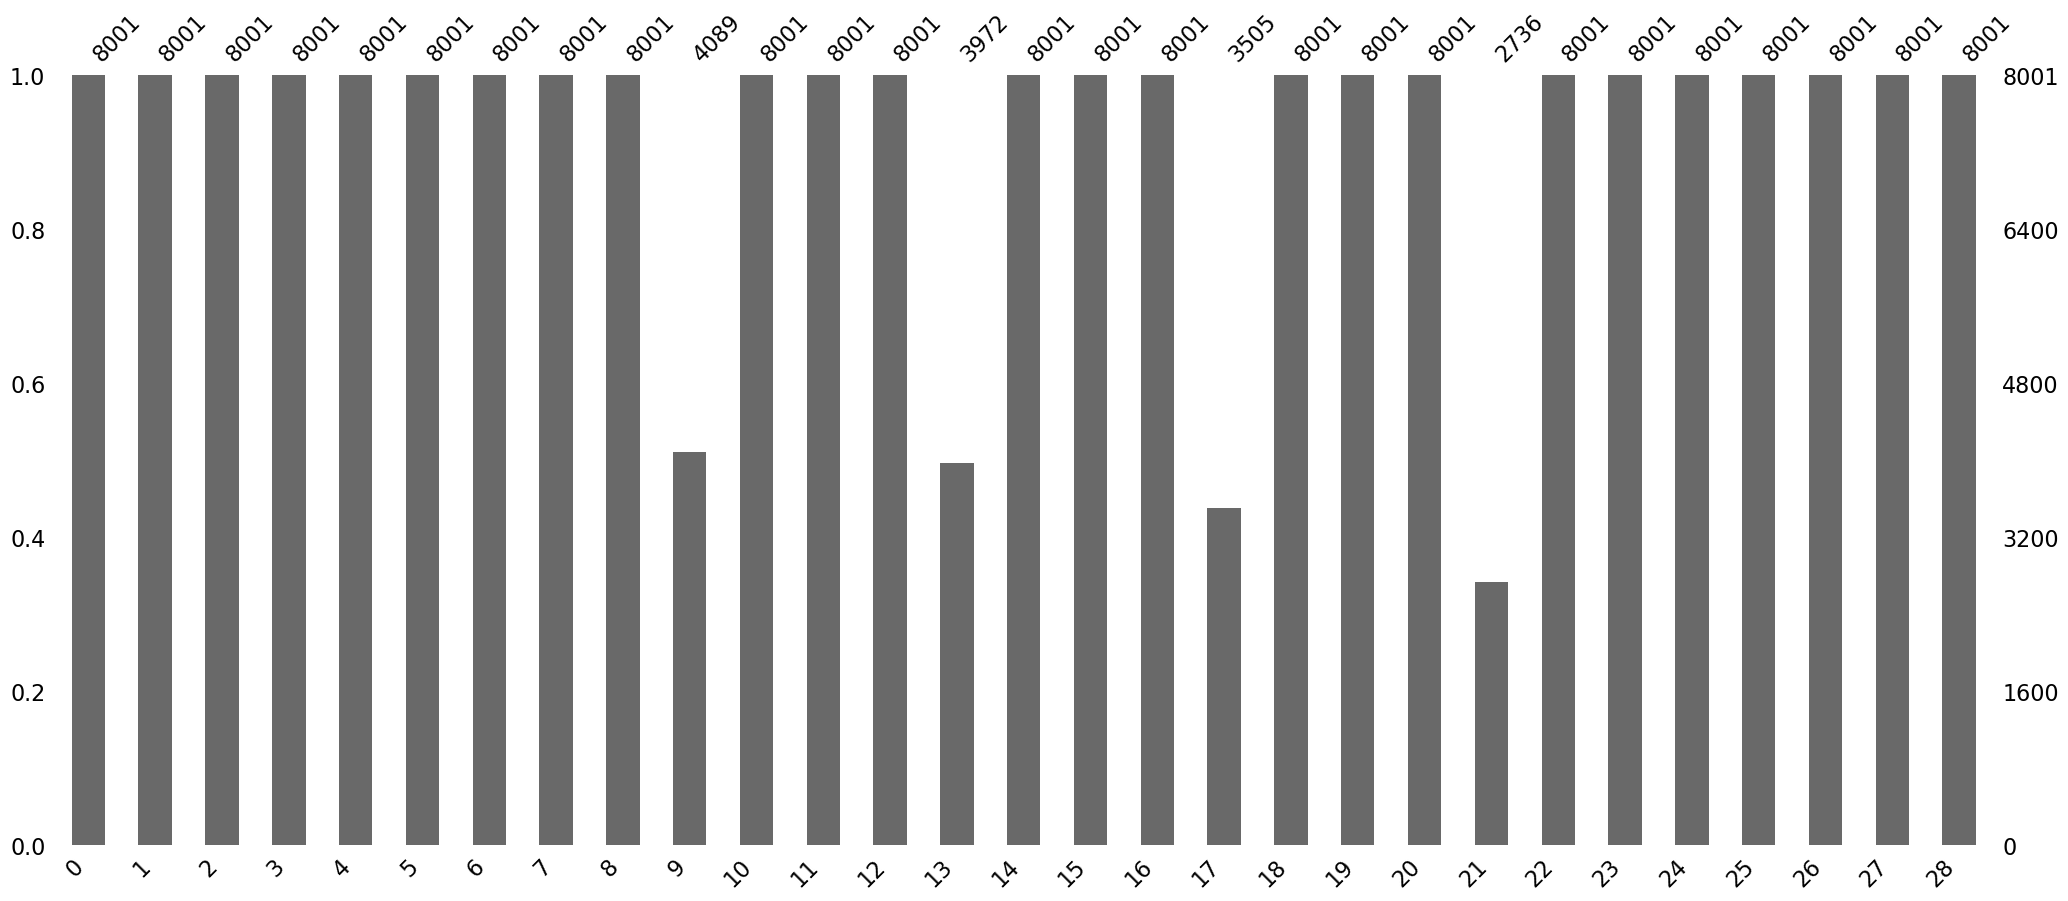

In [6]:
# Visualizing the missing data
msno.bar(df_Higgs)

<Axes: >

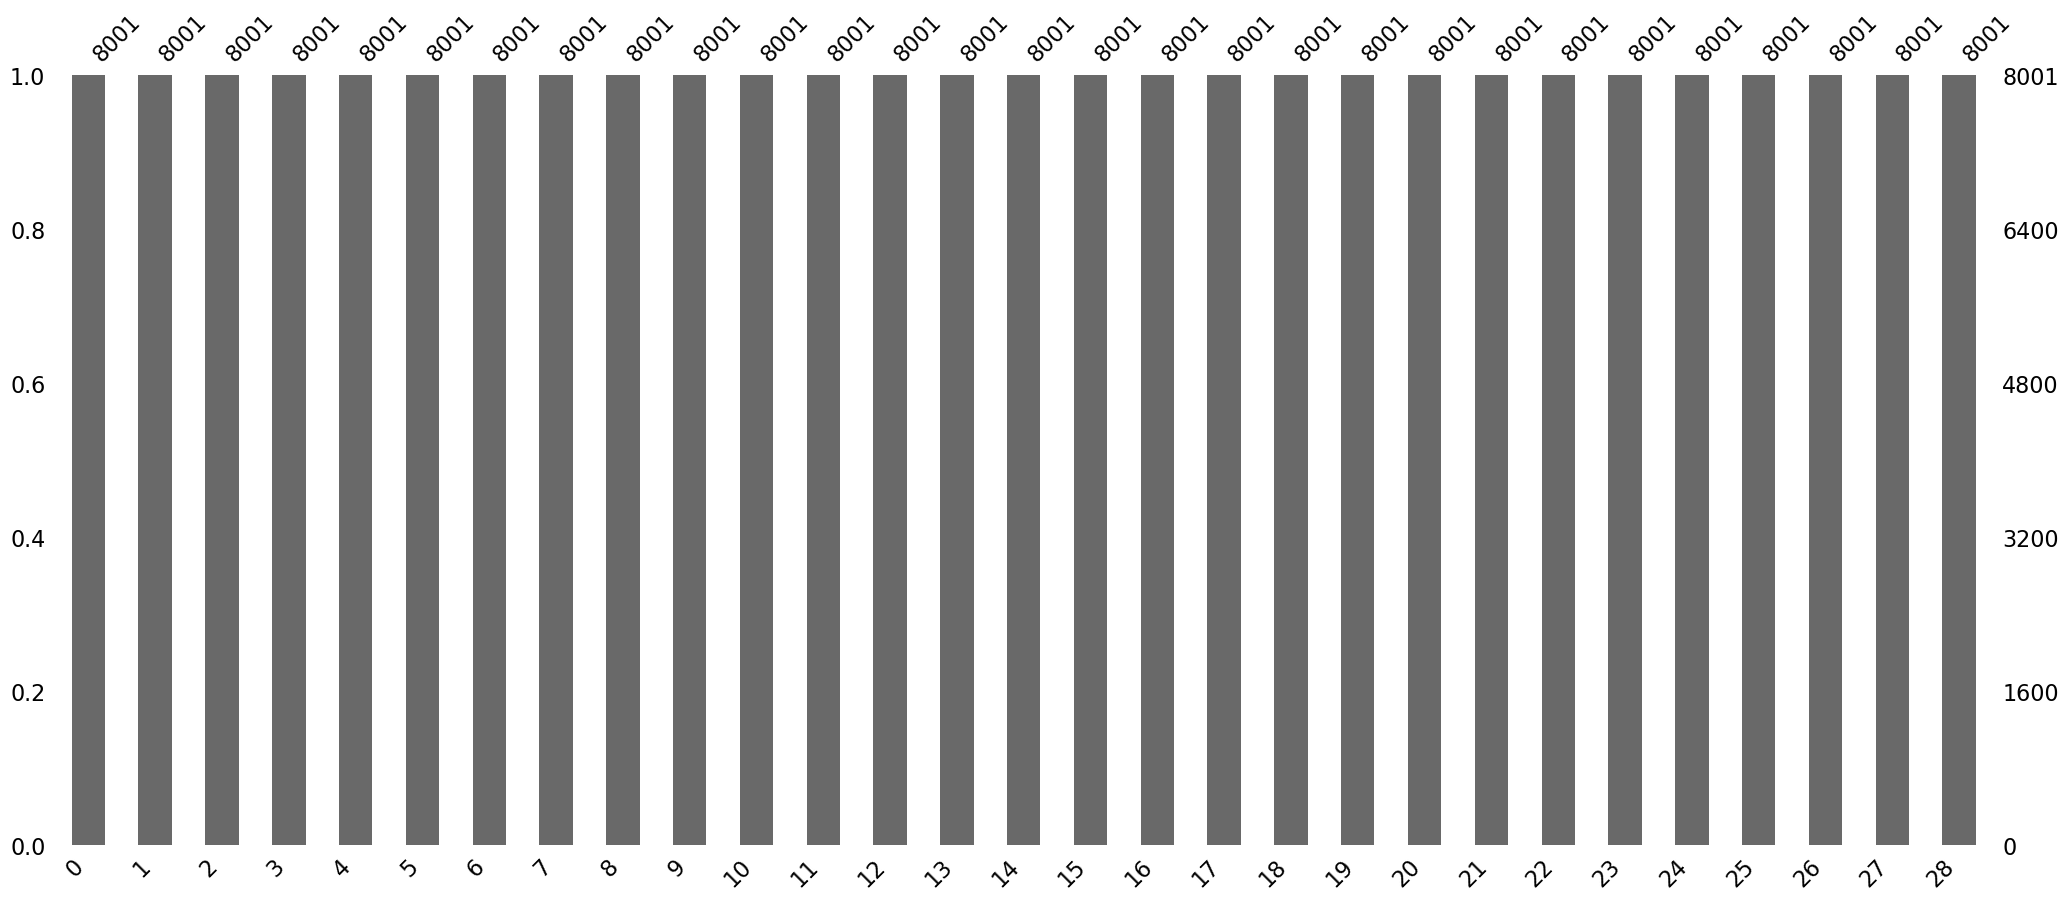

In [7]:
# Applying mean imputation
df_Higgs_imputed = df_Higgs.fillna(df_Higgs.mean())

# Confirming the imputation
msno.bar(df_Higgs_imputed)

#### **C. Presentation**

In [8]:
# Getting the first column and all rows (class column)
Higgs_class = df_Higgs_imputed.iloc[:,0]
# Getting the rest column and all rows (all explanatory variables columns)
Higgs = df_Higgs_imputed.iloc[:,1:]
# Getting the columns 2 to 22 (or 1 to 21 in Python enumeration) and all rows (low level quantities columns)
Higgs_low = df_Higgs_imputed.iloc[:,1:22]
# Getting the column's 23 to 29 (or 22 to 28 in Python enumeration) and all rows (high level quantities columns)
Higgs_high = df_Higgs_imputed.iloc[:,22:]

In [9]:
# Showing the head of all explanatory variables (low and high level quantities) data
Higgs.head()

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,1.966876,1.374992,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.630428,0.404143,0.401026,2.722409,0.355644,1.362199,0.015818,-1.174111,1.966876,1.002695,...,0.387635,1.596321,1.550981,0.859235,0.827233,0.995416,0.764766,0.520597,0.850413,0.929865
2,0.326305,-0.797735,0.223471,1.248234,-1.427857,0.923767,-0.278280,-0.470052,1.966876,0.894418,...,-0.426866,1.153501,2.839496,0.887944,0.924601,0.987189,0.854094,0.385013,0.789912,0.724627
3,1.381170,0.521993,0.574698,0.357347,0.037136,0.413057,-0.607036,-1.308270,1.966876,0.655957,...,0.567525,-1.475778,2.839496,0.936186,1.107217,0.983808,0.693327,0.562045,0.825387,0.846233
4,0.304161,-0.736375,0.686225,0.477172,-1.274736,0.907003,0.324770,-0.463954,2.173076,0.468865,...,0.904818,1.165154,2.839496,1.181790,1.033701,0.993943,0.648399,0.936097,0.732592,0.661779


In [10]:
# Showing the head of low level quantities data
Higgs_low.head()

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,1.966876,1.374992,...,0.930349,1.107436,1.138904,-1.578198,-1.046985,2.327572,0.657930,-0.010455,-0.045767,3.101961
1,1.630428,0.404143,0.401026,2.722409,0.355644,1.362199,0.015818,-1.174111,1.966876,1.002695,...,-1.466066,2.012456,0.782744,-0.882768,1.008969,2.327572,1.536386,0.387635,1.596321,1.550981
2,0.326305,-0.797735,0.223471,1.248234,-1.427857,0.923767,-0.278280,-0.470052,1.966876,0.894418,...,-0.809703,2.012456,1.205289,0.352439,0.626202,2.548224,1.626933,-0.426866,1.153501,2.839496
3,1.381170,0.521993,0.574698,0.357347,0.037136,0.413057,-0.607036,-1.308270,1.966876,0.655957,...,-0.454609,2.214872,1.027034,-1.158574,0.533561,2.327572,1.809489,0.567525,-1.475778,2.839496
4,0.304161,-0.736375,0.686225,0.477172,-1.274736,0.907003,0.324770,-0.463954,2.173076,0.468865,...,-0.168871,2.012456,0.618187,2.103758,1.222542,2.327572,1.093142,0.904818,1.165154,2.839496


In [11]:
# Showing the head of high level quantities data
Higgs_high.head()

,22,23,24,25,26,27,28
0,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,0.859235,0.827233,0.995416,0.764766,0.520597,0.850413,0.929865
2,0.887944,0.924601,0.987189,0.854094,0.385013,0.789912,0.724627
3,0.936186,1.107217,0.983808,0.693327,0.562045,0.825387,0.846233
4,1.181790,1.033701,0.993943,0.648399,0.936097,0.732592,0.661779


In [12]:
# Showing the head of class data
Higgs_class.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: 0, dtype: float64

### **1.2 Data splitting into train and test sets**

In [13]:
# Splitting the data into test and training sets
# test_size = 0.25, the percentage of the test size to the complete dataset (here we choose 25%)
# random_state is the seed. A specific pseudorandom number to split the data set
# in order to produce same splitting every time we run the script.

# Splitting the all explanatory quantities data set
Higgs_train, Higgs_test, Higgs_class_train, Higgs_class_test = train_test_split(Higgs, Higgs_class, test_size = 0.25, random_state = 50)

# Splitting the low level quantities data set
Higgs_low_train, Higgs_low_test, Higgs_low_class_train, Higgs_low_class_test = train_test_split(Higgs_low, Higgs_class, test_size = 0.25, random_state = 50)

# Splitting the high level quantities data set
Higgs_high_train, Higgs_high_test, Higgs_high_class_train, Higgs_high_class_test = train_test_split(Higgs_high, Higgs_class, test_size = 0.25, random_state = 50)

### **1.3 Feature Scaling**

In [14]:
# Definition of scaler
scaler = StandardScaler()

# Applying feature scalling on all explanatory quantities train and test sets
Higgs_train_scaled = scaler.fit_transform(Higgs_train)
Higgs_test_scaled =scaler.transform(Higgs_test)

# Applying feature scalling on low level quantities train and test sets
Higgs_low_train_scaled = scaler.fit_transform(Higgs_low_train)
Higgs_low_test_scaled =scaler.transform(Higgs_low_test)

# Applying feature scalling on low level quantities train and test sets
Higgs_high_train_scaled = scaler.fit_transform(Higgs_high_train)
Higgs_high_test_scaled =scaler.transform(Higgs_high_test)

## **2. SVM classification algorithm**

In [15]:
# The plotting module matplotlib
import matplotlib.pyplot as plt

# The SVM classifier package
from sklearn.svm import SVC

# Calculating the confusion matrix and the accuracy 
from sklearn.metrics import confusion_matrix, accuracy_score

# Display the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Summarize the results of the classification
from sklearn.metrics import classification_report

# Creating the ROC curve and calculating the AUC score
from sklearn.metrics import roc_curve,roc_auc_score

# Defining the SVC model
model_1 = SVC()

## Cross validation, here K-fold
# 6-fold cross validation with initial seed=50
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
kfold = KFold(n_splits=6, shuffle=True, random_state=50)

## Grid search initialization using two hyperparameters
grid_1 = { 
'C': [0.1, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0],
'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']
}

### **2.1 Determining the best SVM model (combining K-fold and grid search)**

#### **A. Classification using all explanatory quantities**

In [16]:
SVC_cv_grid_Higgs = GridSearchCV(estimator=model_1, param_grid=grid_1, scoring='accuracy', cv=kfold)
SVC_cv_grid_Higgs.fit(Higgs_train_scaled, Higgs_class_train)

GridSearchCV(cv=KFold(n_splits=6, random_state=50, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.1, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [17]:
# Print the best parameters and the best score
print("Best hyperparameters found: ", SVC_cv_grid_Higgs.best_params_)
print("Best cross-validation score: ", SVC_cv_grid_Higgs.best_score_)

Best hyperparameters found:  {'C': 2.0, 'kernel': 'rbf'}
Best cross-validation score:  0.6585000000000001


In [18]:
# Building the best SVM model
SVC_Higgs_best = SVC(C=2.0, kernel='rbf',random_state=50,probability=True)
SVC_Higgs_best.fit(Higgs_train_scaled,Higgs_class_train) 

SVC(C=2.0, probability=True, random_state=50)

#### **B. Classification using the low level quantities**

In [19]:
SVC_cv_grid_Higgs_low = GridSearchCV(estimator=model_1, param_grid=grid_1, scoring='accuracy', cv=kfold)
SVC_cv_grid_Higgs_low.fit(Higgs_low_train, Higgs_low_class_train)

GridSearchCV(cv=KFold(n_splits=6, random_state=50, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.1, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [20]:
# Print the best parameters and the best score
print("Best hyperparameters found: ", SVC_cv_grid_Higgs_low.best_params_)
print("Best cross-validation score: ", SVC_cv_grid_Higgs_low.best_score_)

Best hyperparameters found:  {'C': 1.75, 'kernel': 'rbf'}
Best cross-validation score:  0.5795


In [58]:
# Building the best SVM model
SVC_Higgs_low_best = SVC(C=1.75, kernel='rbf',random_state=50,probability=True)
SVC_Higgs_low_best.fit(Higgs_low_train_scaled,Higgs_low_class_train) 

SVC(C=1.75, probability=True, random_state=50)

#### **C. Classification using the high level quantities**

In [22]:
SVC_cv_grid_Higgs_high = GridSearchCV(estimator=model_1, param_grid=grid_1, scoring='accuracy', cv=kfold)
SVC_cv_grid_Higgs_high.fit(Higgs_high_train_scaled, Higgs_high_class_train)

GridSearchCV(cv=KFold(n_splits=6, random_state=50, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.1, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [23]:
# Print the best parameters and the best score
print("Best hyperparameters found: ", SVC_cv_grid_Higgs_high.best_params_)
print("Best cross-validation score: ", SVC_cv_grid_Higgs_high.best_score_)

Best hyperparameters found:  {'C': 1.75, 'kernel': 'rbf'}
Best cross-validation score:  0.6828333333333334


In [24]:
# Building the best SVM model
SVC_Higgs_high_best = SVC(C=1.75, kernel='rbf',random_state=50,probability=True)
SVC_Higgs_high_best.fit(Higgs_high_train_scaled,Higgs_high_class_train) 

SVC(C=1.75, probability=True, random_state=50)

### **2.2 Metrics of the best SVM model**

#### **A. Metrics for all explanatory quantities classification**

In [25]:
# Predict on the test set using the best estimator
Higgs_test_pred_svm = SVC_Higgs_best.predict(Higgs_test_scaled)
Higgs_test_pred_svm

array([1., 1., 1., ..., 0., 1., 1.])

>ALL QUANTITIES CLASSIFICATION

>>Confusion matrix:
[[566 433]
 [252 750]]

>>Accuracy score:
0.657671164417791

>>Display of the confusion matrix:


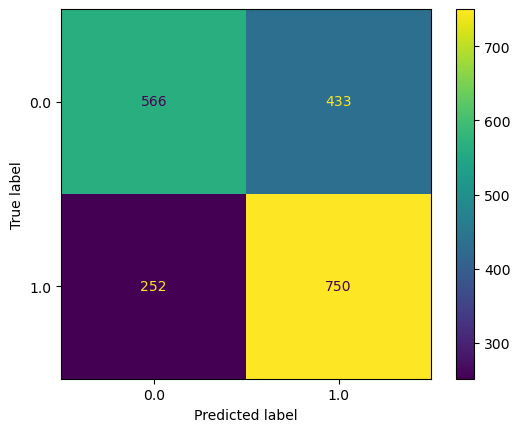


>>Classification report:
              precision    recall  f1-score   support

         0.0       0.69      0.57      0.62       999
         1.0       0.63      0.75      0.69      1002

    accuracy                           0.66      2001
   macro avg       0.66      0.66      0.65      2001
weighted avg       0.66      0.66      0.65      2001



In [26]:
print(">ALL QUANTITIES CLASSIFICATION\n")
# Confusion matrix calculation
cm_Higgs_SVC = confusion_matrix(Higgs_class_test,Higgs_test_pred_svm)
print(">>Confusion matrix:")
print(cm_Higgs_SVC)

# Accuracy score calculation
print("\n>>Accuracy score:")
print(accuracy_score(Higgs_class_test,Higgs_test_pred_svm))

# Display the confusion matrix
print("\n>>Display of the confusion matrix:")
disp_cm_Higgs_SVC = ConfusionMatrixDisplay(confusion_matrix=cm_Higgs_SVC, display_labels=SVC_Higgs_best.classes_)
disp_cm_Higgs_SVC.plot()
plt.show()

# Classification report
print("\n>>Classification report:")
print(classification_report(Higgs_class_test, Higgs_test_pred_svm))

In [27]:
# Predicted probabilities
Higgs_pred_prob_svm = SVC_Higgs_best.predict_proba(Higgs_test_scaled)
display(Higgs_pred_prob_svm)

array([[0.32713849, 0.67286151],
       [0.24140211, 0.75859789],
       [0.4424659 , 0.5575341 ],
       ...,
       [0.55777371, 0.44222629],
       [0.25287107, 0.74712893],
       [0.31304391, 0.68695609]])

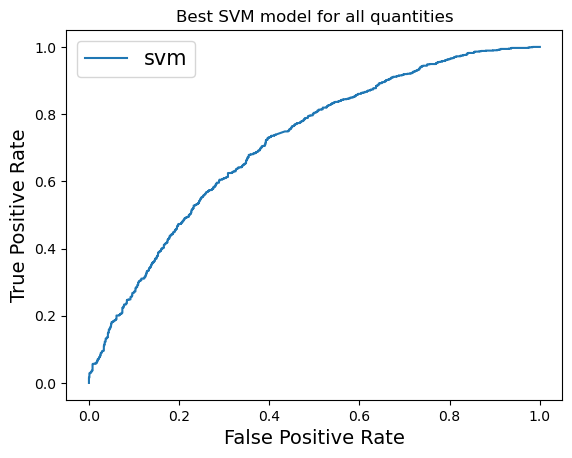

SVM model AUC score: 0.7145543747340155


In [28]:
# Plotting the ROC curve
fpr_Higgs_svm,tpr_Higgs_svm,_ = roc_curve(Higgs_class_test, Higgs_pred_prob_svm[:,1])

plt.plot(fpr_Higgs_svm, tpr_Higgs_svm, label="svm")

plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title("Best SVM model for all quantities")
plt.legend(fontsize=15)
plt.show()

# Calculating the AUC score
AUC_Higgs_svm = roc_auc_score(Higgs_class_test, Higgs_pred_prob_svm[:,1])
print(f'SVM model AUC score: {AUC_Higgs_svm}')  

#### **B. Metrics for low level quantities classification**

In [59]:
# Predict on the test set using the best estimator
Higgs_low_test_pred_svm = SVC_Higgs_low_best.predict(Higgs_low_test_scaled)
Higgs_low_test_pred_svm

array([1., 1., 0., ..., 0., 1., 1.])

>LOW LEVEL QUANTITIES CLASSIFICATION

>>Confusion matrix:
[[444 555]
 [292 710]]

>>Accuracy score:
0.5767116441779111

>>Display of the confusion matrix:


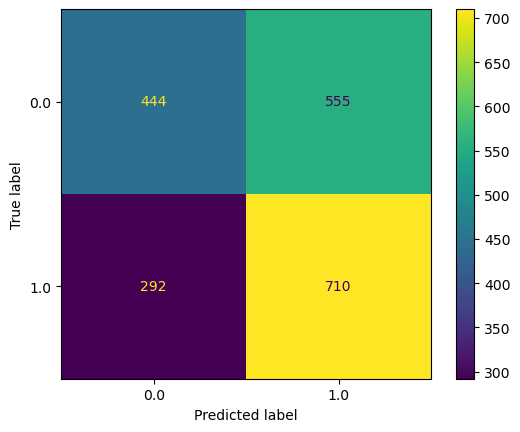


>>Classification report:
              precision    recall  f1-score   support

         0.0       0.60      0.44      0.51       999
         1.0       0.56      0.71      0.63      1002

    accuracy                           0.58      2001
   macro avg       0.58      0.58      0.57      2001
weighted avg       0.58      0.58      0.57      2001



In [60]:
print(">LOW LEVEL QUANTITIES CLASSIFICATION\n")
# Confusion matrix calculation
cm_Higgs_low_SVC = confusion_matrix(Higgs_low_class_test,Higgs_low_test_pred_svm)
print(">>Confusion matrix:")
print(cm_Higgs_low_SVC)

# Accuracy score calculation
print("\n>>Accuracy score:")
print(accuracy_score(Higgs_low_class_test,Higgs_low_test_pred_svm))

# Display the confusion matrix
print("\n>>Display of the confusion matrix:")
disp_cm_Higgs_low_SVC = ConfusionMatrixDisplay(confusion_matrix=cm_Higgs_low_SVC, display_labels=SVC_Higgs_low_best.classes_)
disp_cm_Higgs_low_SVC.plot()
plt.show()

# Classification report
print("\n>>Classification report:")
print(classification_report(Higgs_low_class_test, Higgs_low_test_pred_svm))

In [61]:
# Predicted probabilities
Higgs_low_pred_prob_svm = SVC_Higgs_low_best.predict_proba(Higgs_low_test_scaled)
display(Higgs_low_pred_prob_svm)

array([[0.43158438, 0.56841562],
       [0.46953857, 0.53046143],
       [0.5       , 0.5       ],
       ...,
       [0.5061197 , 0.4938803 ],
       [0.34046211, 0.65953789],
       [0.40177907, 0.59822093]])

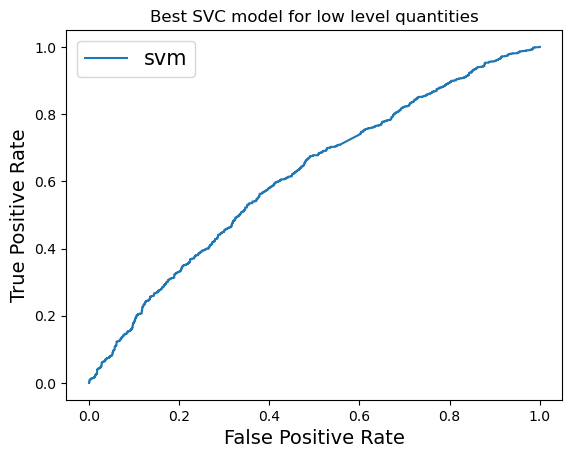

SVM model AUC score: 0.6145017272761784


In [62]:
# Plotting the ROC curve
fpr_Higgs_low_svm,tpr_Higgs_low_svm,_ = roc_curve(Higgs_low_class_test,Higgs_low_pred_prob_svm[:,1])

plt.plot(fpr_Higgs_low_svm, tpr_Higgs_low_svm, label="svm")

plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title("Best SVC model for low level quantities")
plt.legend(fontsize=15)
plt.show()

# Calculating the AUC score
AUC_Higgs_low_svm = roc_auc_score(Higgs_low_class_test, Higgs_low_pred_prob_svm[:,1])
print(f'SVM model AUC score: {AUC_Higgs_low_svm}')  

#### **C. Metrics for high level quantities classification**

In [33]:
# Predict on the test set using the best estimator
Higgs_high_test_pred_svm = SVC_Higgs_high_best.predict(Higgs_high_test_scaled)
Higgs_high_test_pred_svm

array([1., 0., 1., ..., 1., 1., 1.])

>HIGH LEVEL QUANTITIES CLASSIFICATION

>>Confusion matrix:
[[600 399]
 [250 752]]

>>Accuracy score:
0.6756621689155422

>>Display of the confusion matrix:


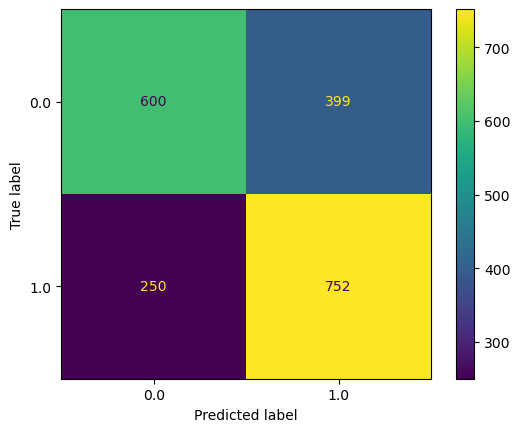


>>Classification report:
              precision    recall  f1-score   support

         0.0       0.71      0.60      0.65       999
         1.0       0.65      0.75      0.70      1002

    accuracy                           0.68      2001
   macro avg       0.68      0.68      0.67      2001
weighted avg       0.68      0.68      0.67      2001



In [34]:
print(">HIGH LEVEL QUANTITIES CLASSIFICATION\n")
# Confusion matrix calculation
cm_Higgs_high_SVC = confusion_matrix(Higgs_high_class_test,Higgs_high_test_pred_svm)
print(">>Confusion matrix:")
print(cm_Higgs_high_SVC)

# Accuracy score calculation
print("\n>>Accuracy score:")
print(accuracy_score(Higgs_high_class_test,Higgs_high_test_pred_svm))

# Display the confusion matrix
print("\n>>Display of the confusion matrix:")
disp_cm_Higgs_high_SVC = ConfusionMatrixDisplay(confusion_matrix=cm_Higgs_high_SVC, display_labels=SVC_Higgs_high_best.classes_)
disp_cm_Higgs_high_SVC.plot()
plt.show()

# Classification report
print("\n>>Classification report:")
print(classification_report(Higgs_high_class_test, Higgs_high_test_pred_svm))

In [35]:
# Predicted probabilities
Higgs_high_pred_prob_svm = SVC_Higgs_high_best.predict_proba(Higgs_high_test_scaled)
display(Higgs_high_pred_prob_svm)

array([[0.33108377, 0.66891623],
       [0.7348468 , 0.2651532 ],
       [0.3156205 , 0.6843795 ],
       ...,
       [0.43278675, 0.56721325],
       [0.33564383, 0.66435617],
       [0.21877021, 0.78122979]])

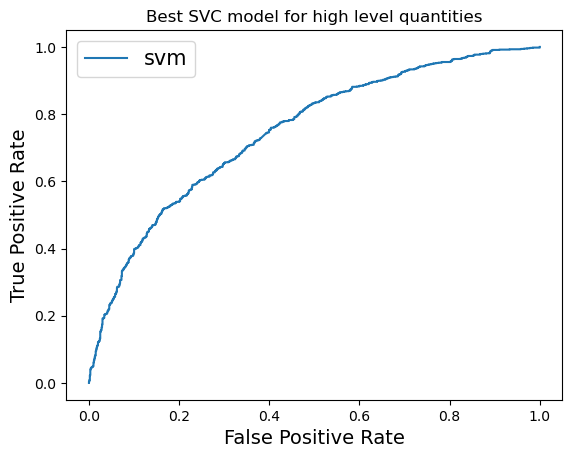

SVM model AUC score: 0.7469715224206244


In [36]:
# Plotting the ROC curve
fpr_Higgs_high_svm,tpr_Higgs_high_svm,_ = roc_curve(Higgs_high_class_test, Higgs_high_pred_prob_svm[:,1])

plt.plot(fpr_Higgs_high_svm, tpr_Higgs_high_svm, label="svm")

plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title("Best SVC model for high level quantities")
plt.legend(fontsize=15)
plt.show()

# Calculating the AUC score
AUC_Higgs_high_svm = roc_auc_score(Higgs_high_class_test, Higgs_high_pred_prob_svm[:,1])
print(f'SVM model AUC score: {AUC_Higgs_high_svm}')  

#### **D. Combined ROC curves**

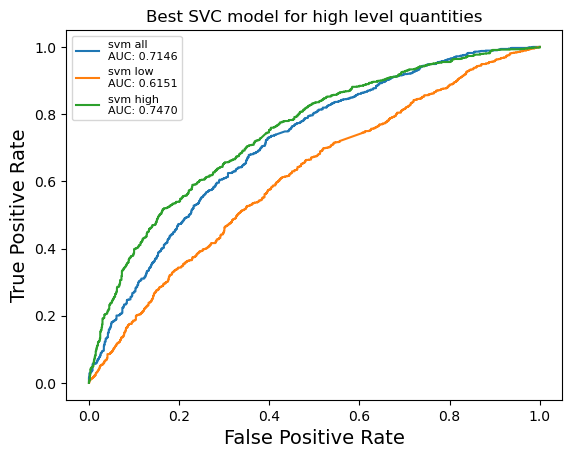

In [37]:
plt.plot(fpr_Higgs_svm, tpr_Higgs_svm, label="svm all\nAUC: %.4f"%AUC_Higgs_svm)
plt.plot(fpr_Higgs_low_svm, tpr_Higgs_low_svm, label="svm low\nAUC: %.4f"%AUC_Higgs_low_svm)
plt.plot(fpr_Higgs_high_svm, tpr_Higgs_high_svm, label="svm high\nAUC: %.4f"%AUC_Higgs_high_svm)

plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title("Best SVC model for high level quantities")
plt.legend(fontsize=8)
plt.show()

## **3. Random forest (RF) classification algorithm**

In [38]:
# Package of the random forest algorith,
from sklearn.ensemble import RandomForestClassifier

# Defining the RF model
model_2 = RandomForestClassifier()

## Grid search initialization using two hyperparameters
grid_2 = { 
'n_estimators': [10, 50, 100, 200],
'criterion' : ["entropy","gini","log_loss"]
}

### **3.1 Determining the best RF model (combining K-fold and grid search)**

#### **A. Classification using all explanatory quantities**

In [39]:
RF_cv_grid_Higgs = GridSearchCV(estimator=model_2, param_grid=grid_2, scoring='accuracy', cv=kfold)
RF_cv_grid_Higgs.fit(Higgs_train_scaled, Higgs_class_train)

GridSearchCV(cv=KFold(n_splits=6, random_state=50, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [40]:
# Print the best parameters and the best score
print("Best hyperparameters found: ", RF_cv_grid_Higgs.best_params_)
print("Best cross-validation score: ", RF_cv_grid_Higgs.best_score_)
RF_Higgs_best = RF_cv_grid_Higgs.best_estimator_

Best hyperparameters found:  {'criterion': 'entropy', 'n_estimators': 200}
Best cross-validation score:  0.7083333333333334


#### **B. Classification using low level quantities**

In [41]:
RF_cv_grid_Higgs_low = GridSearchCV(estimator=model_2, param_grid=grid_2, scoring='accuracy', cv=kfold)
RF_cv_grid_Higgs_low.fit(Higgs_low_train_scaled, Higgs_low_class_train)

GridSearchCV(cv=KFold(n_splits=6, random_state=50, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [42]:
# Print the best parameters and the best score
print("Best hyperparameters found: ", RF_cv_grid_Higgs_low.best_params_)
print("Best cross-validation score: ", RF_cv_grid_Higgs_low.best_score_)
RF_Higgs_low_best = RF_cv_grid_Higgs_low.best_estimator_

Best hyperparameters found:  {'criterion': 'log_loss', 'n_estimators': 200}
Best cross-validation score:  0.5948333333333333


#### **C. Classification using high level quantities**

In [43]:
RF_cv_grid_Higgs_high = GridSearchCV(estimator=model_2, param_grid=grid_2, scoring='accuracy', cv=kfold)
RF_cv_grid_Higgs_high.fit(Higgs_high_train_scaled, Higgs_high_class_train)

GridSearchCV(cv=KFold(n_splits=6, random_state=50, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [44]:
# Print the best parameters and the best score
print("Best hyperparameters found: ", RF_cv_grid_Higgs_high.best_params_)
print("Best cross-validation score: ", RF_cv_grid_Higgs_high.best_score_)
RF_Higgs_high_best = RF_cv_grid_Higgs_high.best_estimator_

Best hyperparameters found:  {'criterion': 'log_loss', 'n_estimators': 200}
Best cross-validation score:  0.6951666666666667


### **3.2 Metrics of the best RF model**

#### **A. Metrics for all explanatory quantities classification**

In [45]:
# Predict on the test set using the best estimator
Higgs_test_pred_rf = RF_Higgs_best.predict(Higgs_test_scaled)
Higgs_test_pred_rf

array([1., 1., 1., ..., 1., 1., 1.])

>ALL QUANTITIES CLASSIFICATION

>>Confusion matrix:
[[663 336]
 [271 731]]

>>Accuracy score:
0.6966516741629185

>>Display of the confusion matrix:


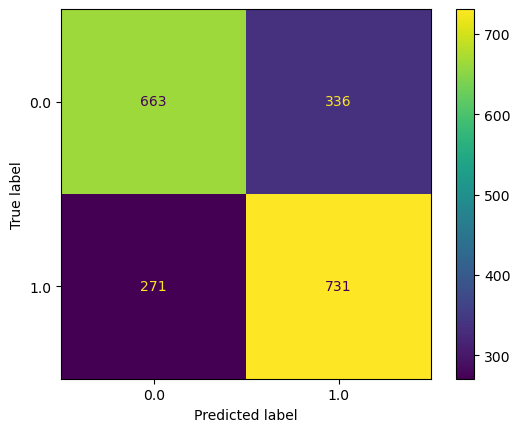


>>Classification report:
              precision    recall  f1-score   support

         0.0       0.71      0.66      0.69       999
         1.0       0.69      0.73      0.71      1002

    accuracy                           0.70      2001
   macro avg       0.70      0.70      0.70      2001
weighted avg       0.70      0.70      0.70      2001



In [46]:
print(">ALL QUANTITIES CLASSIFICATION\n")
# Confusion matrix calculation
cm_Higgs_RF = confusion_matrix(Higgs_class_test,Higgs_test_pred_rf)
print(">>Confusion matrix:")
print(cm_Higgs_RF)

# Accuracy score calculation
print("\n>>Accuracy score:")
print(accuracy_score(Higgs_class_test,Higgs_test_pred_rf))

# Display the confusion matrix
print("\n>>Display of the confusion matrix:")
disp_cm_Higgs_RF = ConfusionMatrixDisplay(confusion_matrix=cm_Higgs_RF, display_labels=RF_Higgs_best.classes_)
disp_cm_Higgs_RF.plot()
plt.show()

# Classification report
print("\n>>Classification report:")
print(classification_report(Higgs_class_test, Higgs_test_pred_rf))

In [47]:
# Predicted probabilities
Higgs_pred_prob_rf = RF_Higgs_best.predict_proba(Higgs_test_scaled)
display(Higgs_pred_prob_rf)

array([[0.3  , 0.7  ],
       [0.475, 0.525],
       [0.43 , 0.57 ],
       ...,
       [0.415, 0.585],
       [0.35 , 0.65 ],
       [0.345, 0.655]])

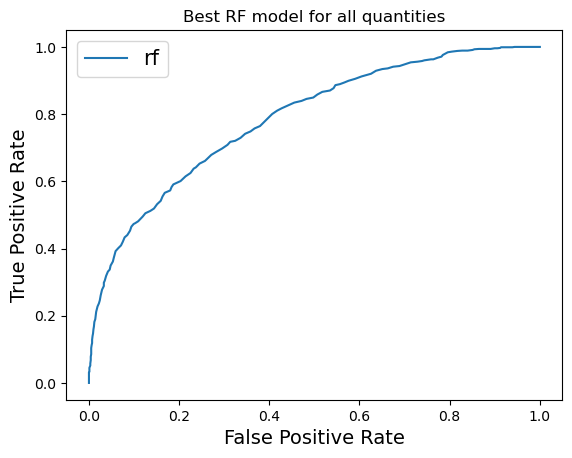

RF model AUC score: 0.785619951288614


In [48]:
# Plotting the ROC curve
fpr_Higgs_rf,tpr_Higgs_rf,_ = roc_curve(Higgs_class_test, Higgs_pred_prob_rf[:,1])

plt.plot(fpr_Higgs_rf, tpr_Higgs_rf, label="rf")

plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title("Best RF model for all quantities")
plt.legend(fontsize=15)
plt.show()

# Calculating the AUC score
AUC_Higgs_rf = roc_auc_score(Higgs_class_test, Higgs_pred_prob_rf[:,1])
print(f'RF model AUC score: {AUC_Higgs_rf}')    

#### **B. Metrics for low level quantities classification**

In [49]:
# Predict on the test set using the best estimator
Higgs_low_test_pred_rf = RF_Higgs_low_best.predict(Higgs_low_test_scaled)
Higgs_low_test_pred_rf

array([0., 1., 0., ..., 0., 1., 1.])

>LOW LEVEL QUANTITIES CLASSIFICATION

>>Confusion matrix:
[[451 548]
 [300 702]]

>>Accuracy score:
0.5762118940529735

>>Display of the confusion matrix:


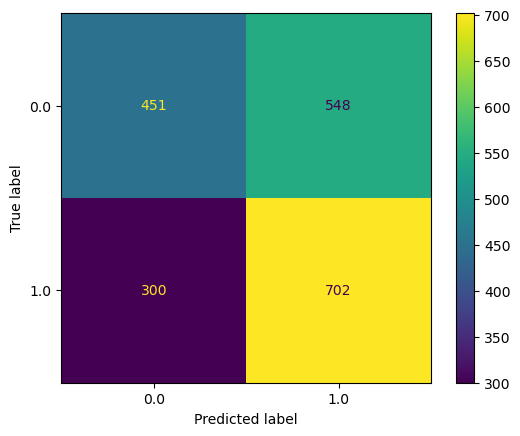


>>Classification report:
              precision    recall  f1-score   support

         0.0       0.60      0.45      0.52       999
         1.0       0.56      0.70      0.62      1002

    accuracy                           0.58      2001
   macro avg       0.58      0.58      0.57      2001
weighted avg       0.58      0.58      0.57      2001



In [50]:
print(">LOW LEVEL QUANTITIES CLASSIFICATION\n")
# Confusion matrix calculation
cm_Higgs_low_RF = confusion_matrix(Higgs_low_class_test,Higgs_low_test_pred_rf)
print(">>Confusion matrix:")
print(cm_Higgs_low_RF)

# Accuracy score calculation
print("\n>>Accuracy score:")
print(accuracy_score(Higgs_low_class_test,Higgs_low_test_pred_rf))

# Display the confusion matrix
print("\n>>Display of the confusion matrix:")
disp_cm_Higgs_low_RF = ConfusionMatrixDisplay(confusion_matrix=cm_Higgs_low_RF, display_labels=RF_Higgs_low_best.classes_)
disp_cm_Higgs_low_RF.plot()
plt.show()

# Classification report
print("\n>>Classification report:")
print(classification_report(Higgs_low_class_test, Higgs_low_test_pred_rf))

In [51]:
# Predicted probabilities
Higgs_low_pred_prob_rf = RF_Higgs_low_best.predict_proba(Higgs_low_test_scaled)
display(Higgs_low_pred_prob_rf)

array([[0.5  , 0.5  ],
       [0.435, 0.565],
       [0.5  , 0.5  ],
       ...,
       [0.5  , 0.5  ],
       [0.295, 0.705],
       [0.37 , 0.63 ]])

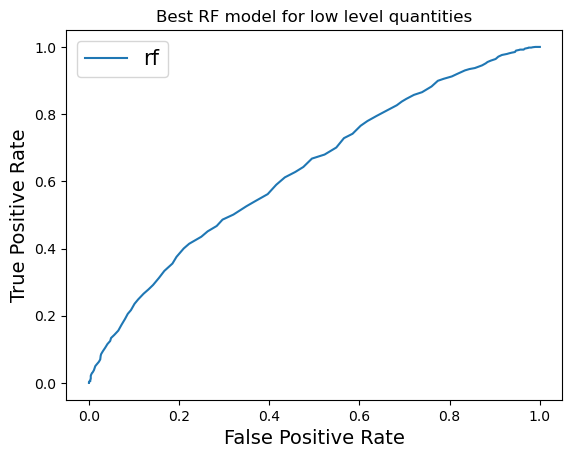

RF model AUC score: 0.6331626037214859


In [52]:
# Plotting the ROC curve
fpr_Higgs_low_rf,tpr_Higgs_low_rf,_ = roc_curve(Higgs_low_class_test,Higgs_low_pred_prob_rf[:,1])

plt.plot(fpr_Higgs_low_rf, tpr_Higgs_low_rf, label="rf")

plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title("Best RF model for low level quantities")
plt.legend(fontsize=15)
plt.show()

# Calculating the AUC score
AUC_Higgs_low_rf = roc_auc_score(Higgs_low_class_test, Higgs_low_pred_prob_rf[:,1])
print(f'RF model AUC score: {AUC_Higgs_low_rf}')  

#### **C. Metrics for high level quantities classification**

In [53]:
# Predict on the test set using the best estimator
Higgs_high_test_pred_rf = RF_Higgs_high_best.predict(Higgs_high_test_scaled)
Higgs_high_test_pred_rf

array([1., 0., 1., ..., 1., 1., 1.])

>HIGH LEVEL QUANTITIES CLASSIFICATION

>>Confusion matrix:
[[652 347]
 [293 709]]

>>Accuracy score:
0.68015992003998

>>Display of the confusion matrix:


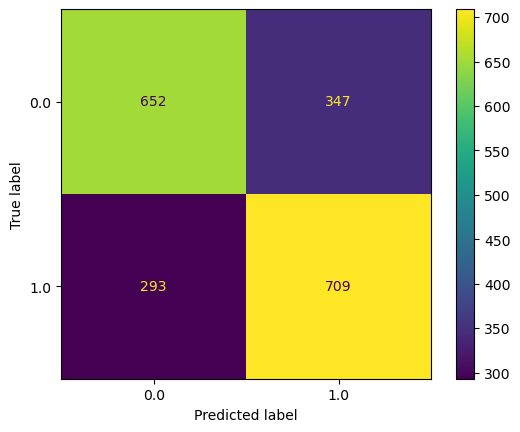


>>Classification report:
              precision    recall  f1-score   support

         0.0       0.69      0.65      0.67       999
         1.0       0.67      0.71      0.69      1002

    accuracy                           0.68      2001
   macro avg       0.68      0.68      0.68      2001
weighted avg       0.68      0.68      0.68      2001



In [54]:
print(">HIGH LEVEL QUANTITIES CLASSIFICATION\n")
# Confusion matrix calculation
cm_Higgs_high_RF = confusion_matrix(Higgs_high_class_test,Higgs_high_test_pred_rf)
print(">>Confusion matrix:")
print(cm_Higgs_high_RF)

# Accuracy score calculation
print("\n>>Accuracy score:")
print(accuracy_score(Higgs_high_class_test,Higgs_high_test_pred_rf))

# Display the confusion matrix
print("\n>>Display of the confusion matrix:")
disp_cm_Higgs_high_RF = ConfusionMatrixDisplay(confusion_matrix=cm_Higgs_high_RF, display_labels=RF_Higgs_high_best.classes_)
disp_cm_Higgs_high_RF.plot()
plt.show()

# Classification report
print("\n>>Classification report:")
print(classification_report(Higgs_high_class_test, Higgs_high_test_pred_rf))

In [55]:
# Predicted probabilities
Higgs_high_pred_prob_rf = RF_Higgs_high_best.predict_proba(Higgs_high_test_scaled)
display(Higgs_high_pred_prob_rf)

array([[0.2  , 0.8  ],
       [0.595, 0.405],
       [0.36 , 0.64 ],
       ...,
       [0.41 , 0.59 ],
       [0.265, 0.735],
       [0.35 , 0.65 ]])

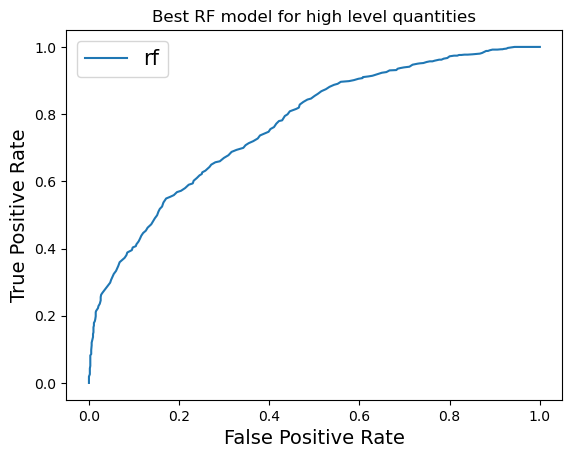

RF model AUC score: 0.7670205135274996


In [56]:
# Plotting the ROC curve
fpr_Higgs_high_rf,tpr_Higgs_high_rf,_ = roc_curve(Higgs_high_class_test, Higgs_high_pred_prob_rf[:,1])

plt.plot(fpr_Higgs_high_rf, tpr_Higgs_high_rf, label="rf")

plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title("Best RF model for high level quantities")
plt.legend(fontsize=15)
plt.show()

# Calculating the AUC score
AUC_Higgs_high_rf = roc_auc_score(Higgs_high_class_test, Higgs_high_pred_prob_rf[:,1])
print(f'RF model AUC score: {AUC_Higgs_high_rf}')  

#### **D. Combined ROC curves**

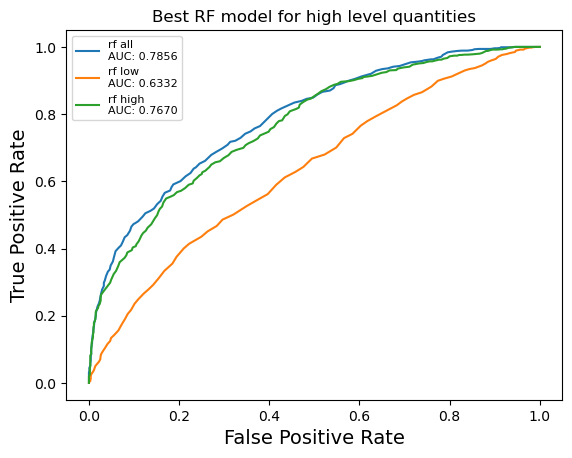

In [57]:
plt.plot(fpr_Higgs_rf, tpr_Higgs_rf, label="rf all\nAUC: %.4f"%AUC_Higgs_rf)
plt.plot(fpr_Higgs_low_rf, tpr_Higgs_low_rf, label="rf low\nAUC: %.4f"%AUC_Higgs_low_rf)
plt.plot(fpr_Higgs_high_rf, tpr_Higgs_high_rf, label="rf high\nAUC: %.4f"%AUC_Higgs_high_rf)

plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title("Best RF model for high level quantities")
plt.legend(fontsize=8)
plt.show()